<a href="https://colab.research.google.com/github/Dae12-Han/TMI_capstone/blob/main/train_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TMI

!unzip -qq "/content/drive/MyDrive/TMI/data_img.zip"

/content/drive/MyDrive/TMI
replace __MACOSX/data_img/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


### 라이브러리 로드

In [ ]:
import tensorflow as tf
from tensorflow import keras #import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
import numpy as np
from tensorflow.keras import Model
from keras import optimizers


#from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint

import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os, shutil

keras.__version__

'2.12.0'

## 파일 불러오기

In [ ]:
import pathlib

In [ ]:
data_dir = pathlib.PosixPath('/content/drive/MyDrive/TMI/data_img')

In [ ]:
print(data_dir)

/content/drive/MyDrive/TMI/data_img


In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

200

In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['toilet_flush', 'baby_crying', 'door_knock', 'clock_alram',
       'vaccum_cleaner'], dtype='<U14')

## Train/Test/Validation Dataset 만들기

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 클래스 리스트
classes = ['baby_crying', 'clock_alram', 'toilet_flush', 'vaccum_cleaner','door_knock']

# 원본 이미지 경로
data_dir = '/content/drive/MyDrive/TMI/data_img'

# train, test, validation 데이터를 저장할 경로
train_dir = '/content/drive/MyDrive/TMI/data_img/train'
test_dir = '/content/drive/MyDrive/TMI/data_img/test'
validation_dir = '/content/drive/MyDrive/TMI/data_img/validation'

for cls in classes:
    # 각 클래스의 원본 이미지 경로
    src_dir = os.path.join(data_dir, cls)

    # 이미지 파일 리스트
    files = os.listdir(src_dir)
    print(files)

    # train, test 분할
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)

    # train, validation 분할
    train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)

    # 각 클래스별로 폴더를 생성
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, cls), exist_ok=True)

    # train, test, validation 폴더에 이미지 복사
    for file in train_files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(train_dir, cls))
    for file in test_files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(test_dir, cls))
    for file in val_files:
        shutil.copy(os.path.join(src_dir, file), os.path.join(validation_dir, cls))

['5-198411-F-20.png', '2-66637-B-20.png', '3-152007-A-20.png', '4-167077-B-20.png', '3-152007-C-20.png', '1-60997-B-20.png', '5-198411-D-20.png', '4-59579-B-20.png', '1-211527-B-20.png', '4-185575-A-20.png', '3-151081-B-20.png', '2-107351-B-20.png', '1-22694-A-20.png', '5-198411-B-20.png', '5-151085-A-20.png', '2-50665-A-20.png', '4-185575-C-20.png', '3-152007-E-20.png', '1-60997-A-20.png', '4-167077-C-20.png', '4-59579-A-20.png', '5-198411-G-20.png', '2-151079-A-20.png', '2-66637-A-20.png', '5-198411-E-20.png', '4-167077-A-20.png', '3-152007-B-20.png', '5-198411-A-20.png', '2-50666-A-20.png', '1-22694-B-20.png', '2-107351-A-20.png', '1-211527-C-20.png', '1-187207-A-20.png', '4-185575-B-20.png', '3-152007-D-20.png', '1-211527-A-20.png', '5-198411-C-20.png', '2-80482-A-20.png', '3-151081-A-20.png', '3-151080-A-20.png']
['3-132340-A-37.png', '2-78562-B-37.png', '5-223176-A-37.png', '4-172366-A-37.png', '5-210612-A-37.png', '5-233645-A-37.png', '2-104476-A-37.png', '5-250629-A-37.png', '4

In [ ]:
# training용 디렉터리
train_vacuum_cleaner_dir = os.path.join(train_dir, 'vacuum_cleaner')
train_toilet_flush_dir = os.path.join(train_dir, 'toilet_flush')
train_door_knock_dir = os.path.join(train_dir, 'door_knock')
train_baby_crying_dir = os.path.join(train_dir, 'baby_crying')
train_clock_alarm_dir = os.path.join(train_dir, 'clock_alarm')

In [ ]:
# validation용 디렉터리
validation_vacuum_cleaner_dir = os.path.join(validation_dir, 'vacuum_cleaner')
validation_toilet_flush_dir = os.path.join(validation_dir, 'toilet_flush')
validation_door_knock_dir = os.path.join(validation_dir, 'door_knock')
validation_baby_crying_dir = os.path.join(validation_dir, 'baby_crying')
validation_clock_alarm_dir = os.path.join(validation_dir, 'clock_alarm')

In [ ]:
# test용 디렉터리
test_vacuum_cleaner_dir = os.path.join(test_dir, 'vacuum_cleaner')
test_toilet_flush_dir = os.path.join(test_dir, 'toilet_flush')
test_door_knock_dir = os.path.join(test_dir, 'door_knock')
test_baby_crying_dir = os.path.join(test_dir, 'baby_crying')
test_clock_alarm_dir = os.path.join(test_dir, 'clock_alarm')

In [ ]:
print('훈련용 vacuum_cleaner 이미지 전체 개수:', len(os.listdir(train_vacuum_cleaner_dir)))

훈련용 vacuum_cleaner 이미지 전체 개수: 24


## 모델 및 학습

In [ ]:
##### conv 3, pooling 3
class AcousticSoundModel(tf.keras.Model):
    def __init__(self):
        super(AcousticSoundModel, self).__init__()
        self.conv1 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop1 = Dropout(rate=0.2)
        self.pool1 = MaxPool2D(padding='SAME') ###### pooling 2x2. stride는 표기 x, 확인 ######

        self.conv2 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop2 = Dropout(rate=0.2) #20% dropout
        self.pool2 = MaxPool2D(padding='SAME')

        self.conv3 = Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.drop3 = Dropout(rate=0.2) #20% dropout
        self.pool3 = MaxPool2D(padding='SAME')

        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = Dense(units=128, activation=tf.nn.relu)
        self.dense5 = Dense(units=5, activation=tf.nn.sigmoid) ### 일단 5. class 개수 추가되는 대로 변경

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.drop1(net)
        net = self.pool1(net)

        net = self.conv2(net)
        net = self.drop2(net)
        net = self.pool2(net)

        net = self.conv3(net)
        net = self.drop3(net)
        net = self.pool3(net)

        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.dense5(net) #
        return net

In [ ]:
model = AcousticSoundModel()

In [ ]:
model.summary()

In [ ]:
learning_rate = 0.001
training_epochs = 100
batch_size = 4 #64
target_size=(150, 150)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, #target directory
        target_size=target_size, #150 150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 120 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break

batch data size: (4, 150, 150, 3)
batch label size: (4, 5)


In [ ]:
print(train_dir)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25, # batch크기 4, 전체 200개 샘플이니까 25
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
25/25 [==============================] - 76s 693ms/step - loss: 1.6370 - acc: 0.3200 - val_loss: 1.3001 - val_acc: 0.5250
Epoch 2/100
25/25 [==============================] - 17s 680ms/step - loss: 1.2779 - acc: 0.4200 - val_loss: 1.5145 - val_acc: 0.3500
Epoch 3/100
25/25 [==============================] - 18s 711ms/step - loss: 1.1919 - acc: 0.6200 - val_loss: 1.2264 - val_acc: 0.5250
Epoch 4/100
25/25 [==============================] - 16s 646ms/step - loss: 0.7395 - acc: 0.7100 - val_loss: 1.2412 - val_acc: 0.3500
Epoch 5/100
25/25 [==============================] - 16s 610ms/step - loss: 0.7125 - acc: 0.7000 - val_loss: 0.5521 - val_acc: 0.8250
Epoch 6/100
25/25 [==============================] - 17s 675ms/step - loss: 0.3768 - acc: 0.8800 - val_loss: 0.6244 - val_acc: 0.8000
Epoch 7/100
25/25 [==============================] - 18s 734ms/step - loss: 0.4476 - acc: 0.8300 - val_loss: 0.5632 - val_acc: 0.8250
Epoch 8/100
25/25 [==============================] - 18s 731ms

In [ ]:
# 저장된 모델을 언제든지 로드하고 평가할 수 있습니다.
# 훈련 끝나면 호델 저장
model.save_weights('model', save_format='tf')

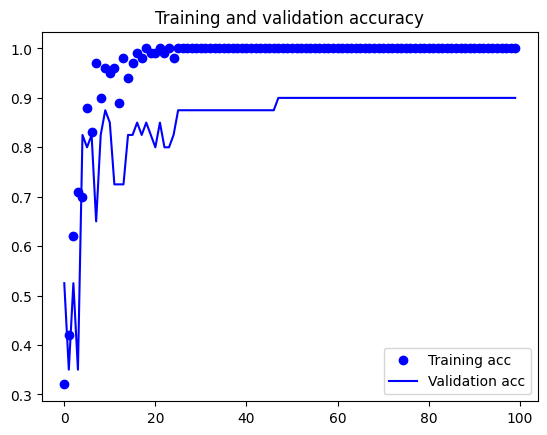

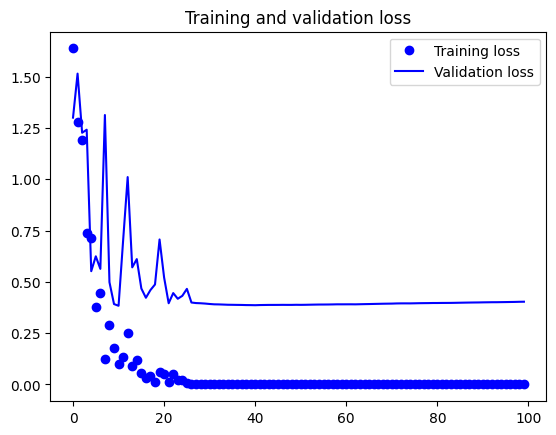

In [ ]:
#훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()